In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-top-10-tracks-singer-wise-in-india/indian_singers_top_tracks_spotify.csv
/kaggle/input/spotify-top-10-tracks-singer-wise-in-india/indian_singers_top_tracks_spotify2.csv


## Importing Required Libraries

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud,STOPWORDS

## Loading Dataset 1 and Dataset 2

In [3]:
df1 = pd.read_csv('/kaggle/input/spotify-top-10-tracks-singer-wise-in-india/indian_singers_top_tracks_spotify.csv')

In [4]:
df2 = pd.read_csv('/kaggle/input/spotify-top-10-tracks-singer-wise-in-india/indian_singers_top_tracks_spotify2.csv')

## Joining Both CSV Files

In [5]:
top_tracks = pd.concat([df1,df2])
top_tracks

,Singer Name,Song Name 1,Song Name 2,Song Name 3,Song Name 4,Song Name 5,Song Name 6,Song Name 7,Song Name 8,Song Name 9,Song Name 10
0,Vishal Mishra,"1.Kaise Hua (From ""Kabir Singh"")",2.Manjha,3.Pehla Pyaar,4.Zihaal e Miskin,"5.Naacho Naacho (From ""Rrr"")","6.Naseeb Se (From ""Satyaprem Ki Katha"")","7.Naacho Naacho (From ""Rrr"")",8.Aaj Bhi,"9.Nai Lagda (From ""Notebook"")","10.Soniye Je (From ""Gumraah"")"
1,Arijit Singh,1.Kesariya,"2.Phir Aur Kya Chahiye (From ""Zara Hatke Zara ...","3.O Bedardeya (From ""Tu Jhoothi Main Makkaar"")",4.Tere Pyaar Mein,"5.Agar Tum Saath Ho (From ""Tamasha"")",6.Jhoome Jo Pathaan,"7.Pyaar Hota Kayi Baar Hai (From ""Tu Jhoothi M...","8.Tujhe Kitna Chahne Lage (From ""Kabir Singh"")","9.Tere Hawaale (From ""Laal Singh Chaddha"")",10.Shayad
2,Kumar Sanu,"1.Chura Ke Dil Mera (From ""Main Khiladi Tu Ana...",2.Tumsa Koi Pyaara,3.Ae Kash Ke Hum,"4.Sochenge Tumhe Pyar (From ""Deewana"")","5.Ek Din Aap (From ""Yes Boss"")",6.Ladki Badi Anjani Hai,7.Tujhe Dekha To,8.Dheere Dheere Se Meri Zindagi Mein Aana (Fro...,"9.Mera Dil Bhi Kitna Pagal Hai (From ""Saajan"")","10.Aankh Marey (From ""Simmba"")"
3,A. R. Reihana,1.Ponni Nadhi,"2.Saarattu Vandiyila (From ""Kaatru Veliyidai"")","3.Ponge Nadhi [From ""PS-1 (Telugu)""]",4.Kedakkari,5.Ya Nabi Salam Alaika,6.Karma Veeran,7.Morethukochindhi,8.Ponni Nadhi,9.Hey Magic Maname Title Track,10.Ponni Nadhi [From “PS-1 (Malayalam)”]
4,Aarti Mukherji,1.Do Naina Aur Ek Kahani,2.Shyam Teri Bansi Pukare,3.Takhon Tomar Ekush Bachhar,4.Ek Baishakhe Dekha Holo Dujanay,5.Ei Mom Jochhonay Ango Bhijiye Eso Na,6.Aji Thahro Zara Dekho,7.Aaj Ki Raat Charangon,8.Katha Kichhu Kichhu Bujhe Nite Hoy,9.Main Wohi Darpan Wohi,10.Laje Ranga Holo Kone Bou Go
...,...,...,...,...,...,...,...,...,...,...,...
64,Vaikom Vijayalakshmi,1.En Jeevan,2.Soppanasundari,3.Kannulo Unnavu,"4.Manniley Eeramundu (From ""Jai Bhim"")",5.Vaayadi Petha Pulla,6.Kaikkottum Kandittilla,7.Aaravalli,8.Kodaiyila,9.Kerala Manninayi,10.Piravi
65,Vaishali Samant,1.Radha Kaise Na Jale,2.Gulabachi Kali,3.Cham Cham Karta,4.Aika Dajiba,"5.Kombdi Palali - From ""Jatra""",6.Kehdoon Tumhen (Close To U),7.Aabhas Ha,8.Patil Aala,9.Mast Challay Amcha,10.Mera Dadla
66,Vandana Srinivasan,1.Koodamela Koodavechi,2.Nee Illai Endraal,3.Unnale,4.Karuvakaatu Karuvaaya,5.Sandakkaari,6.Karukkuchoopu Kurraada,7.Marudhaani,"8.Penne O Penne (From ""Naan Sigappu Manithan"")",9.Athana Per Mathiyila,10.Adiye Unna Paathida
67,Vasundhara Das,1.Kahin To,2.It's the Time to Disco,3.Chale Jaise Hawaien,4.Kannum Kannum,5.Where's the Party Tonight,6.Naaku Neeku,7.Salaam Namaste,"8.Kattipudi Kattipudida (From ""Kushi"")",9.Secret Of Success,"10.Shakalakka Baby ( From ""Mudhalvan"")"


## Cleaning Dataset

In [6]:
#Removing numbering from the songs
col_names = ['Song Name 1','Song Name 2','Song Name 3','Song Name 4','Song Name 5','Song Name 6','Song Name 7','Song Name 8','Song Name 9','Song Name 10']
song_names=list()
song_position = 1
for i in col_names:
    for j in top_tracks[i]:
        song_names.append(j[2:])
    top_tracks['song_name'+str(song_position)]=song_names
    song_position= song_position+1
    song_names=[]    

In [7]:
top_tracks

,Singer Name,Song Name 1,Song Name 2,Song Name 3,Song Name 4,Song Name 5,Song Name 6,Song Name 7,Song Name 8,Song Name 9,...,song_name1,song_name2,song_name3,song_name4,song_name5,song_name6,song_name7,song_name8,song_name9,song_name10
0,Vishal Mishra,"1.Kaise Hua (From ""Kabir Singh"")",2.Manjha,3.Pehla Pyaar,4.Zihaal e Miskin,"5.Naacho Naacho (From ""Rrr"")","6.Naseeb Se (From ""Satyaprem Ki Katha"")","7.Naacho Naacho (From ""Rrr"")",8.Aaj Bhi,"9.Nai Lagda (From ""Notebook"")",...,"Kaise Hua (From ""Kabir Singh"")",Manjha,Pehla Pyaar,Zihaal e Miskin,"Naacho Naacho (From ""Rrr"")","Naseeb Se (From ""Satyaprem Ki Katha"")","Naacho Naacho (From ""Rrr"")",Aaj Bhi,"Nai Lagda (From ""Notebook"")",".Soniye Je (From ""Gumraah"")"
1,Arijit Singh,1.Kesariya,"2.Phir Aur Kya Chahiye (From ""Zara Hatke Zara ...","3.O Bedardeya (From ""Tu Jhoothi Main Makkaar"")",4.Tere Pyaar Mein,"5.Agar Tum Saath Ho (From ""Tamasha"")",6.Jhoome Jo Pathaan,"7.Pyaar Hota Kayi Baar Hai (From ""Tu Jhoothi M...","8.Tujhe Kitna Chahne Lage (From ""Kabir Singh"")","9.Tere Hawaale (From ""Laal Singh Chaddha"")",...,Kesariya,"Phir Aur Kya Chahiye (From ""Zara Hatke Zara Ba...","O Bedardeya (From ""Tu Jhoothi Main Makkaar"")",Tere Pyaar Mein,"Agar Tum Saath Ho (From ""Tamasha"")",Jhoome Jo Pathaan,"Pyaar Hota Kayi Baar Hai (From ""Tu Jhoothi Mai...","Tujhe Kitna Chahne Lage (From ""Kabir Singh"")","Tere Hawaale (From ""Laal Singh Chaddha"")",.Shayad
2,Kumar Sanu,"1.Chura Ke Dil Mera (From ""Main Khiladi Tu Ana...",2.Tumsa Koi Pyaara,3.Ae Kash Ke Hum,"4.Sochenge Tumhe Pyar (From ""Deewana"")","5.Ek Din Aap (From ""Yes Boss"")",6.Ladki Badi Anjani Hai,7.Tujhe Dekha To,8.Dheere Dheere Se Meri Zindagi Mein Aana (Fro...,"9.Mera Dil Bhi Kitna Pagal Hai (From ""Saajan"")",...,"Chura Ke Dil Mera (From ""Main Khiladi Tu Anari"")",Tumsa Koi Pyaara,Ae Kash Ke Hum,"Sochenge Tumhe Pyar (From ""Deewana"")","Ek Din Aap (From ""Yes Boss"")",Ladki Badi Anjani Hai,Tujhe Dekha To,Dheere Dheere Se Meri Zindagi Mein Aana (From ...,"Mera Dil Bhi Kitna Pagal Hai (From ""Saajan"")",".Aankh Marey (From ""Simmba"")"
3,A. R. Reihana,1.Ponni Nadhi,"2.Saarattu Vandiyila (From ""Kaatru Veliyidai"")","3.Ponge Nadhi [From ""PS-1 (Telugu)""]",4.Kedakkari,5.Ya Nabi Salam Alaika,6.Karma Veeran,7.Morethukochindhi,8.Ponni Nadhi,9.Hey Magic Maname Title Track,...,Ponni Nadhi,"Saarattu Vandiyila (From ""Kaatru Veliyidai"")","Ponge Nadhi [From ""PS-1 (Telugu)""]",Kedakkari,Ya Nabi Salam Alaika,Karma Veeran,Morethukochindhi,Ponni Nadhi,Hey Magic Maname Title Track,.Ponni Nadhi [From “PS-1 (Malayalam)”]
4,Aarti Mukherji,1.Do Naina Aur Ek Kahani,2.Shyam Teri Bansi Pukare,3.Takhon Tomar Ekush Bachhar,4.Ek Baishakhe Dekha Holo Dujanay,5.Ei Mom Jochhonay Ango Bhijiye Eso Na,6.Aji Thahro Zara Dekho,7.Aaj Ki Raat Charangon,8.Katha Kichhu Kichhu Bujhe Nite Hoy,9.Main Wohi Darpan Wohi,...,Do Naina Aur Ek Kahani,Shyam Teri Bansi Pukare,Takhon Tomar Ekush Bachhar,Ek Baishakhe Dekha Holo Dujanay,Ei Mom Jochhonay Ango Bhijiye Eso Na,Aji Thahro Zara Dekho,Aaj Ki Raat Charangon,Katha Kichhu Kichhu Bujhe Nite Hoy,Main Wohi Darpan Wohi,.Laje Ranga Holo Kone Bou Go
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,Vaikom Vijayalakshmi,1.En Jeevan,2.Soppanasundari,3.Kannulo Unnavu,"4.Manniley Eeramundu (From ""Jai Bhim"")",5.Vaayadi Petha Pulla,6.Kaikkottum Kandittilla,7.Aaravalli,8.Kodaiyila,9.Kerala Manninayi,...,En Jeevan,Soppanasundari,Kannulo Unnavu,"Manniley Eeramundu (From ""Jai Bhim"")",Vaayadi Petha Pulla,Kaikkottum Kandittilla,Aaravalli,Kodaiyila,Kerala Manninayi,.Piravi
65,Vaishali Samant,1.Radha Kaise Na Jale,2.Gulabachi Kali,3.Cham Cham Karta,4.Aika Dajiba,"5.Kombdi Palali - From ""Jatra""",6.Kehdoon Tumhen (Close To U),7.Aabhas Ha,8.Patil Aala,9.Mast Challay Amcha,...,Radha Kaise Na Jale,Gulabachi Kali,Cham Cham Karta,Aika Dajiba,"Kombdi Palali - From ""Jatra""",Kehdoon Tumhen (Close To U),Aabhas Ha,Patil Aala,Mast Challay Amcha,.Mera Dadla
66,Vandana Srinivasan,1.Koo

In [8]:
#Removing columns which have song names with numbering
top_tracks.drop(['Song Name 1','Song Name 2','Song Name 3','Song Name 4','Song Name 5','Song Name 6','Song Name 7','Song Name 8','Song Name 9','Song Name 10'],axis=1,inplace=True)

## Genearting Word Cloud

In [9]:
#Collecting song names at one place
column_names = ['song_name1', 'song_name2', 'song_name3', 'song_name4',
       'song_name5', 'song_name6', 'song_name7', 'song_name8', 'song_name9',
       'song_name10']
for i in column_names:
    song_names_data= "".join(top_tracks[i])

In [10]:
song_names_data

'.Soniye Je (From "Gumraah").Shayad.Aankh Marey (From "Simmba").Ponni Nadhi [From “PS-1 (Malayalam)”].Laje Ranga Holo Kone Bou Go.Abhi Na Jao Chhod Kaar Unplugged - Female.Party All Night (From "Boss").Poon Thendralai.Ladki Badi Anjani Hai.Gore Gore O Banke Chhore.Veerangana.Ejaak Jonakiye.Sunar Sajnwa.July Matham (From "Pudhiya Mugam").Neenu Iruvaga.Pyar Kiya To Nibhana.Appan Panna ("From Thiruppattchi" ).Kesariya - Dance Mix.Alisha.Jodi Tare Nai Chini Go.Pilla Puli.Tum San Naina.Aey Kothati Mone Rekho.Janu Meri Jaan - From "Shaan".Nai Lagda (From "Notebook").Kempu Thotadalli (From "Yudha Kaanda").Porechhi Chanpa Dure Shari.Amm Annadhi Oka Kammani.Ma Aayeen Aayan Teenhje.Kanngalin Vennilavae.Sukno Dale Notun Pata.Ilavenirkala (From Manam Virumbuthe Unnai).Deep ne Deepali.Dur Dur.Zara Zara - LoFi Chill.Kottha Kottha Gaa.Sakhi Sakhi.Maalai Saatrinaal.Yeh Roz Roz Isharon Mein.96 (Theme) - From "96".Shlokas.Nayan.Mane Chudi Piravan Lagyo.Suna Hai Log.Na Jao Saiyan Chhuda Ke Baiyan.Monalis

In [11]:
stopword_text = set(STOPWORDS)

In [12]:
wordcloud = WordCloud(width=800,height=400,background_color='white',min_font_size=10,stopwords=stopword_text).generate(song_names_data)

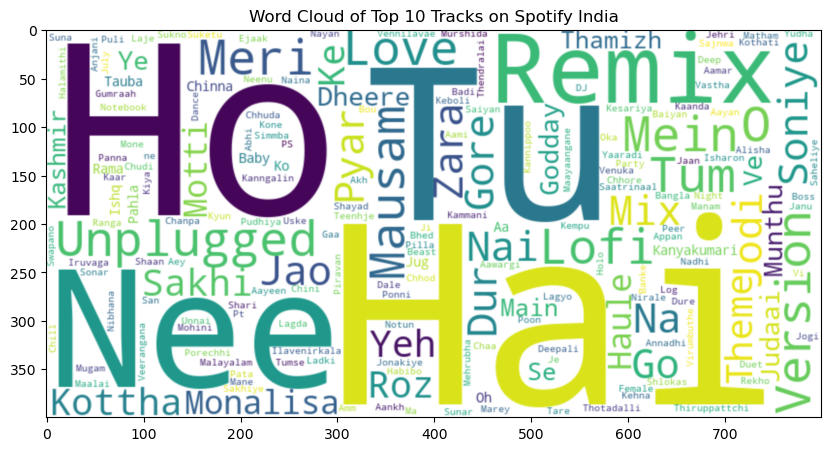

In [13]:
plt.figure(figsize=(10,6))
plt.imshow(wordcloud,interpolation='bicubic')
plt.title('Word Cloud of Top 10 Tracks on Spotify India')
plt.show()